# Imports necesarios para realizar la EDA

In [37]:
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt
import xlrd
import missingno
import seaborn as sns
%matplotlib inline

# Variables globales

In [12]:
FILE_PATH = r'datos_separados.xlsx'

# Carga de datos en el entorno

In [19]:
def load_data(*args):
    sheets = xlrd.open_workbook(FILE_PATH, on_demand=True).sheet_names()
    data_frames = []
    for _, value in enumerate(sheets):
        data_frames.append(pd.read_excel(args[0], value))
    return data_frames, sheets

In [48]:
def reporte(df):
    print("")
    print("")
    print(df.info())
    print(df.head())

    print("")
    if len(df[df.isnull().any(axis=1)] != 0):
        print(r"Valores ausentes en los datos: \n")
        print(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    if len(df[df.duplicated()]) > 0:
        print(r"NUmero de datos duplicados: {}".format(df[df.duplicated()]))
        print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print(r"No se encontraron datos duplicados")

    print("indices del dataframe: \n {}".format(df.index))
    print("")
    print("forma del dataframe: \n {}".format(df.shape))
    print("")
    print("descripción del dataframe: \n {}".format(df.describe()))
    print("")
    for item in df:
        print(item)
        print(df[item].nunique())
    return None
   
def numerico(df, hue=None):
    print("Revisando la distribución numerica de los datos")
    display(df.describe().T)
    cols = df.select_dtypes(include=np.number).columns
    figura = plt.figure(figsize=(20, 10))
    figura.add_subplot(1, len(cols), 1)
    for idx, col in enumerate(cols):
        if idx > 0:
            figura.add_subplot(1, len(cols), idx + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figura.tight_layout()
    plt.show()

    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x = col, y = col_num, kind='violin', data = df, height = 5, aspect = 2)
                fig.set_xticklabels(rotation = 90)
                plt.show()

    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()

                
def clean_verify(dataframe):
    pass

def save(dataframe, sheet_name):
    df.to_csv(r'eda_{}.csv'.format(name), index=False)
    

In [33]:
data_frames, names = load_data(FILE_PATH)

Revisando la distribución numerica de los datos


,count,mean,std,min,25%,50%,75%,max
Número de Desacatos a decretos de COVID-19,41.0,2.292683,9.526919,0.0,0.0,0.0,1.0,60.0
Establecimientos que incumplan decretos de COVID-19,41.0,0.121951,0.556557,0.0,0.0,0.0,0.0,3.0
Menores de edad que incumplan decretos COVID-19,41.0,0.414634,0.999390,0.0,0.0,0.0,0.0,4.0
Casos de violencia intrafamiliar atendidos,41.0,1.853659,4.629044,0.0,0.0,0.0,1.0,22.0


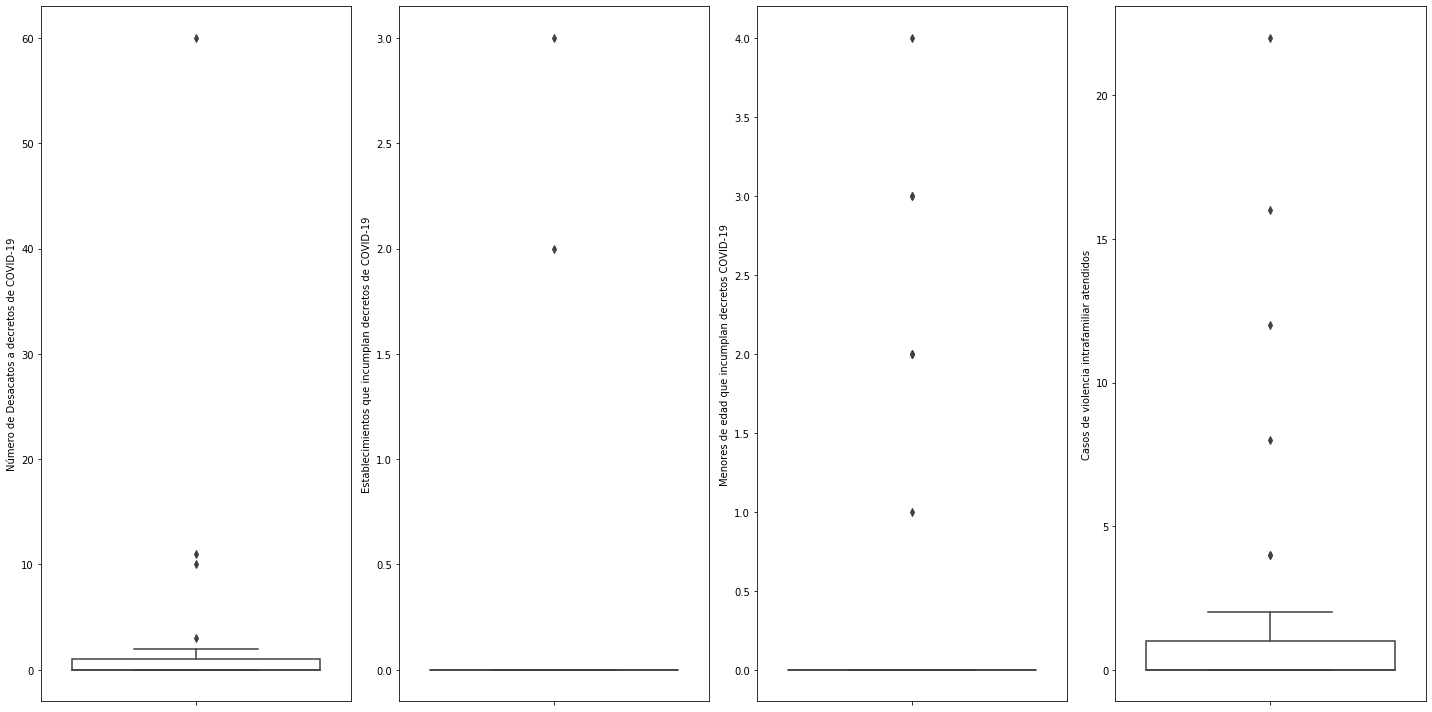

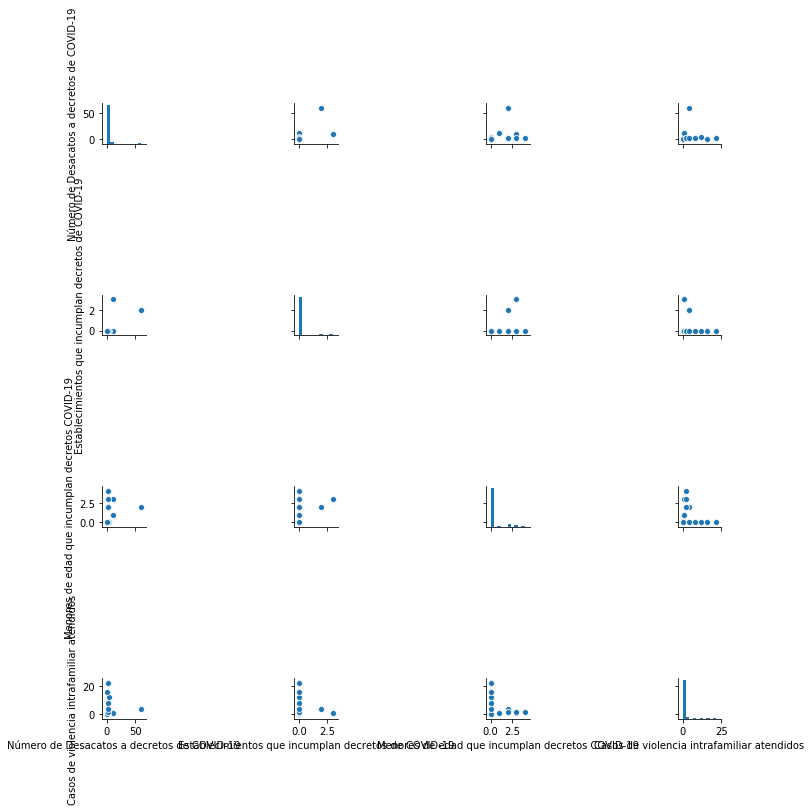

Revisando la distribución numerica de los datos


,count,mean,std,min,25%,50%,75%,max
Hurtos a personas,41.0,36.024390,31.745463,0.0,2.0,34.0,65.0,94.0
Hurtos a comercio,41.0,36.170732,30.963610,0.0,2.0,38.0,60.0,99.0
Lesiones personales,41.0,37.439024,34.937121,0.0,2.0,26.0,68.0,94.0
Homicidios,41.0,33.195122,32.473235,0.0,1.0,23.0,62.0,95.0


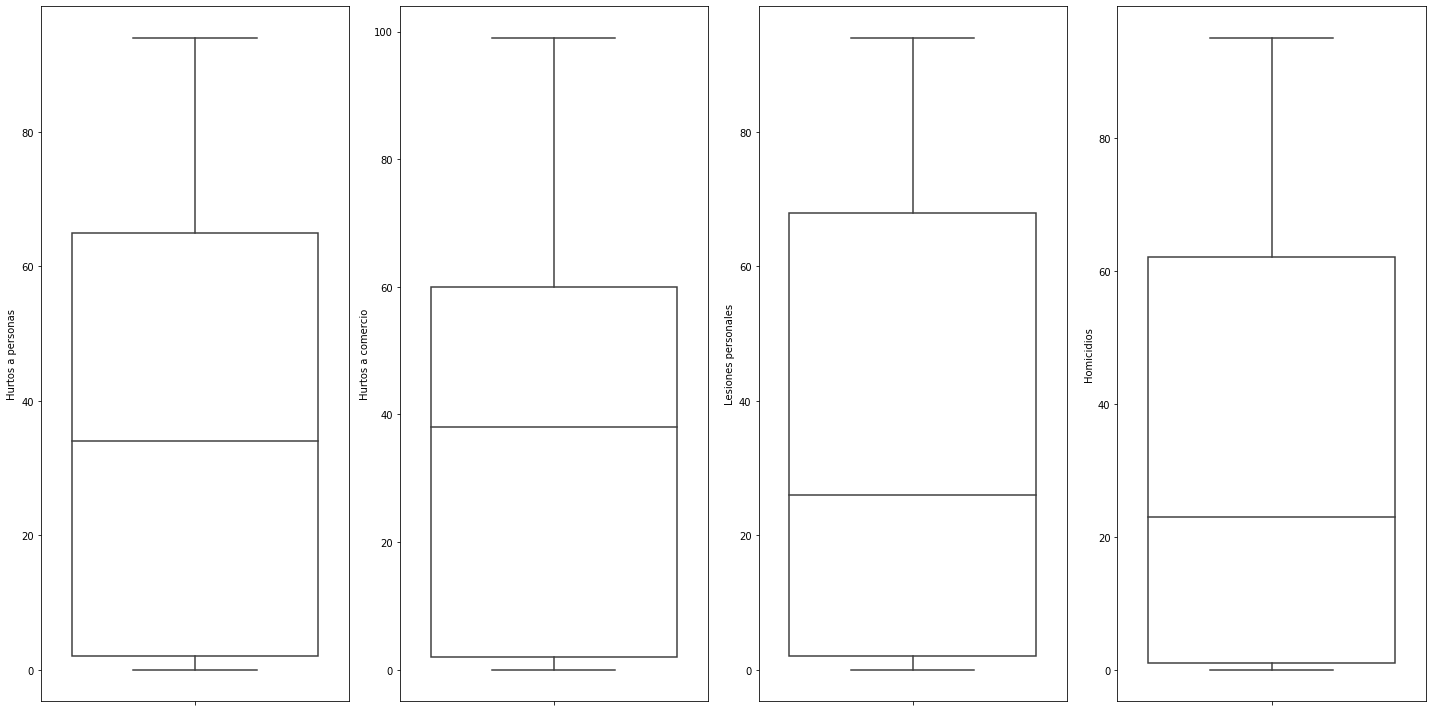

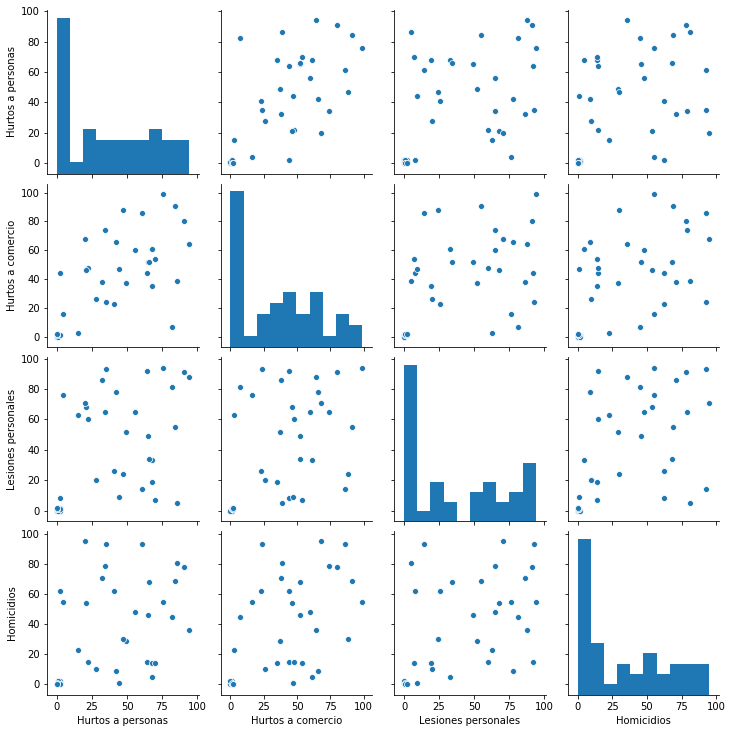

Revisando la distribución numerica de los datos


,count,mean,std,min,25%,50%,75%,max
Número de pasajeros en metrolinea,40.0,57561.925000,27330.105935,11010.000000,34962.750000,54996.000000,81439.000000,99954.000000
Número de pasajeros en metrolínea día de la semana anterior,40.0,57385.275000,29063.396835,8206.000000,34184.250000,62988.500000,81605.000000,99131.000000
Variación de pasajeros,40.0,0.523023,1.620066,-0.864919,-0.336409,-0.006729,0.544721,7.524007


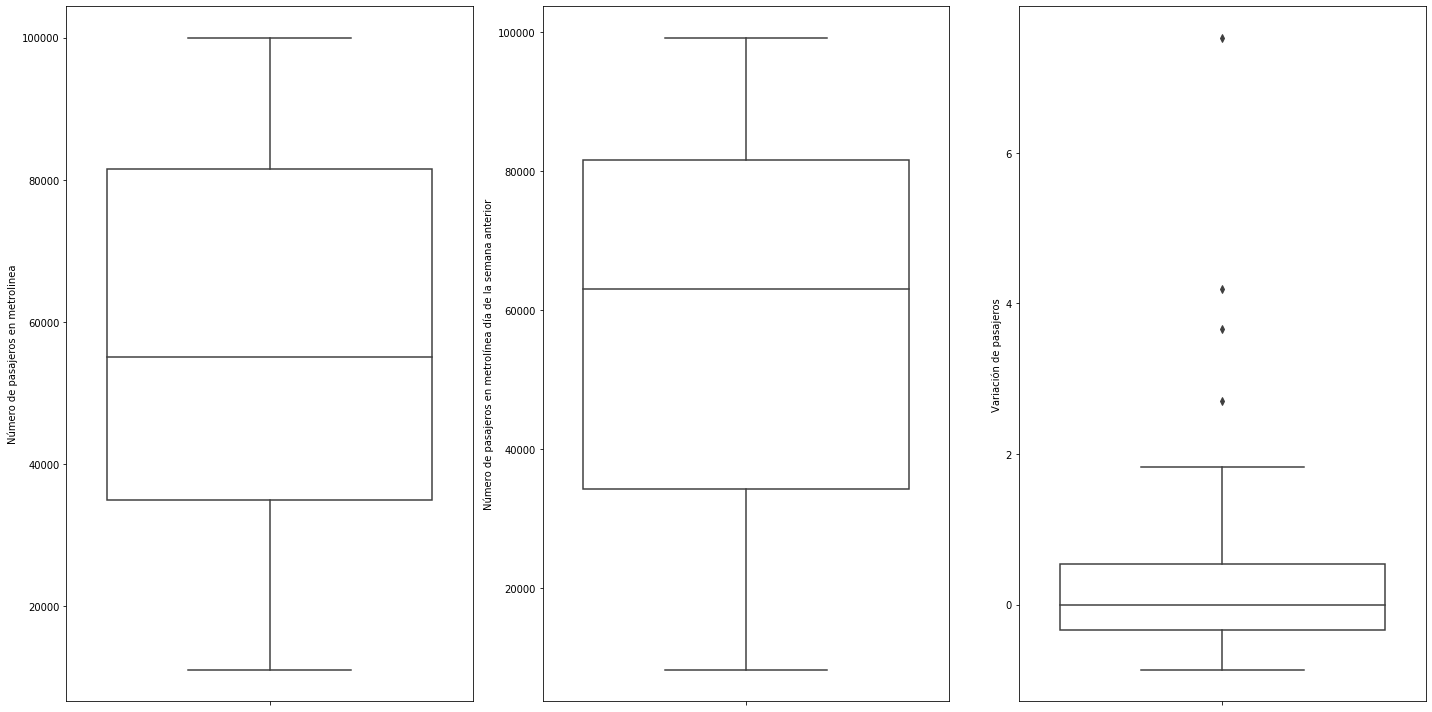

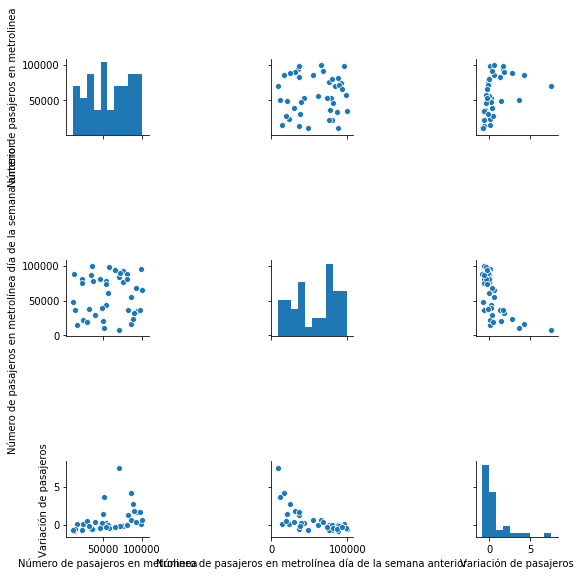

Revisando la distribución numerica de los datos


,count,mean,std,min,25%,50%,75%,max
Comparendos totales,40.0,84.150,60.647595,5.0,31.75,74.5,146.25,199.0
Comparendos por Decretos COVID-19,40.0,3.875,8.061264,0.0,0.00,0.0,1.50,31.0


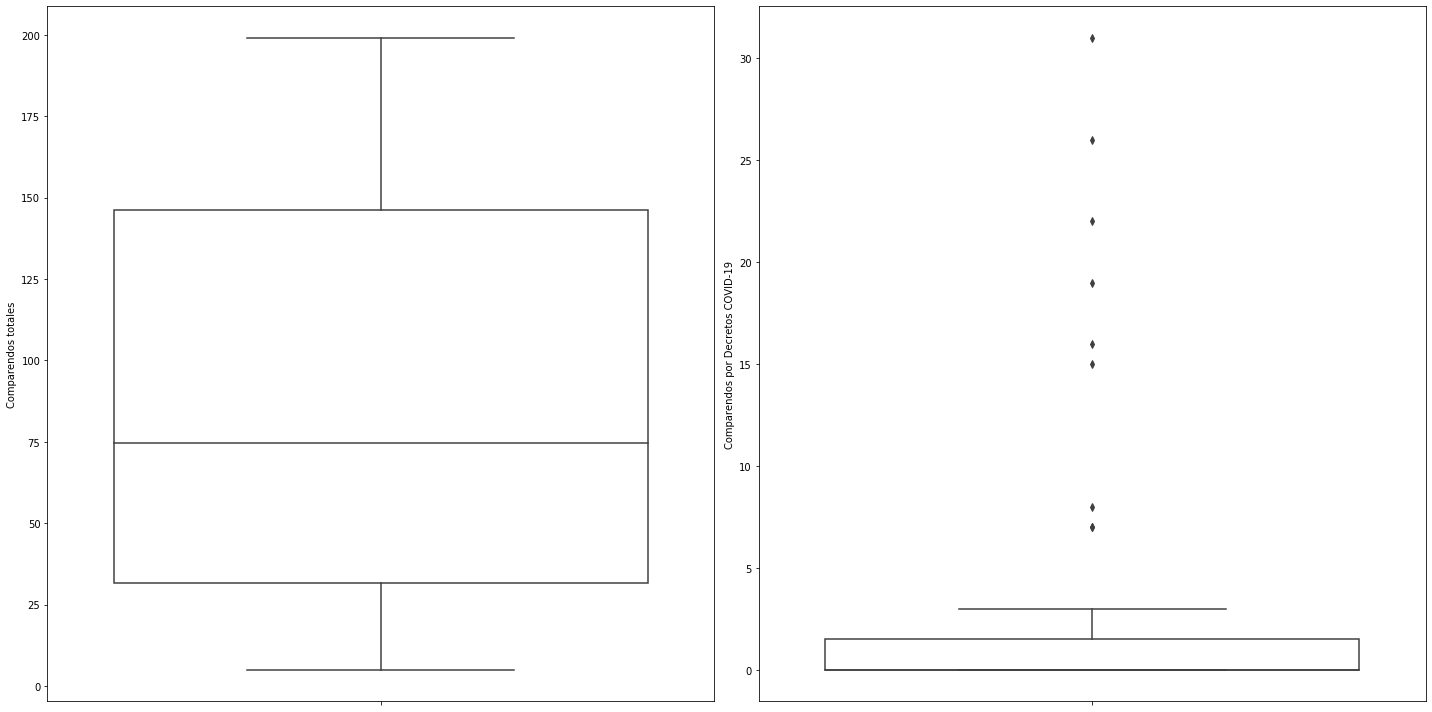

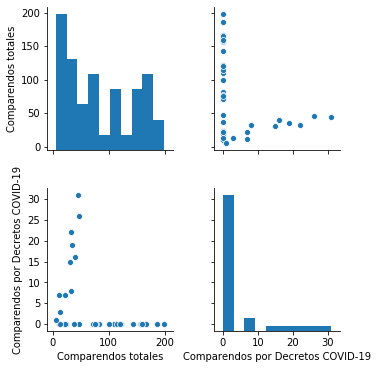

Revisando la distribución numerica de los datos


,count,mean,std,min,25%,50%,75%,max
Número de accidentes de transito,40.0,18.275,16.757681,0.0,1.75,15.5,32.75,49.0
Número de accidentes en moto,40.0,9.500,8.311253,0.0,2.00,8.0,16.50,25.0
Número de accidentes en carro,40.0,2.950,2.551520,0.0,0.75,2.5,5.00,8.0


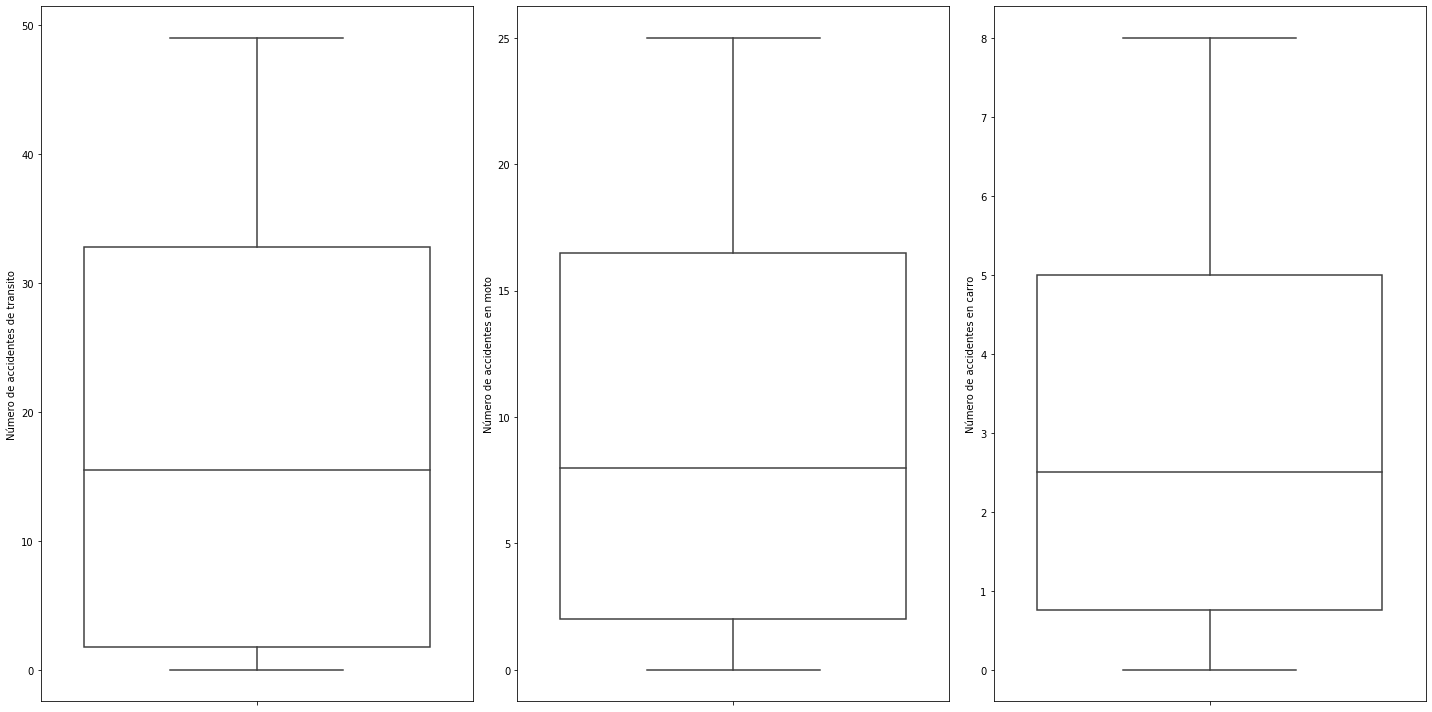

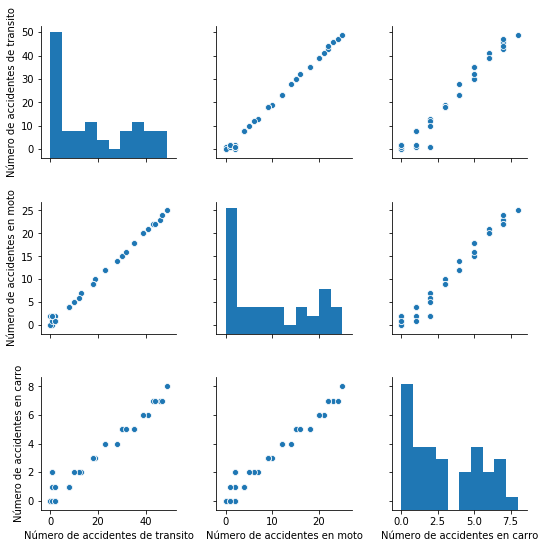

Revisando la distribución numerica de los datos


,count,mean,std,min,25%,50%,75%,max
Lesionados en accidentes de transito,40.0,38.700,35.353308,0.0,0.0,35.0,64.75,98.0
Lesionados en moto,40.0,19.500,17.728725,0.0,0.0,18.0,32.50,49.0
Lesionados en carro,40.0,1.975,1.846514,0.0,0.0,2.0,3.00,5.0
Lesionados peatones,40.0,0.700,0.723241,0.0,0.0,1.0,1.00,2.0
Lesionados ciclistas ( bici-usuarios),40.0,0.000,0.000000,0.0,0.0,0.0,0.00,0.0


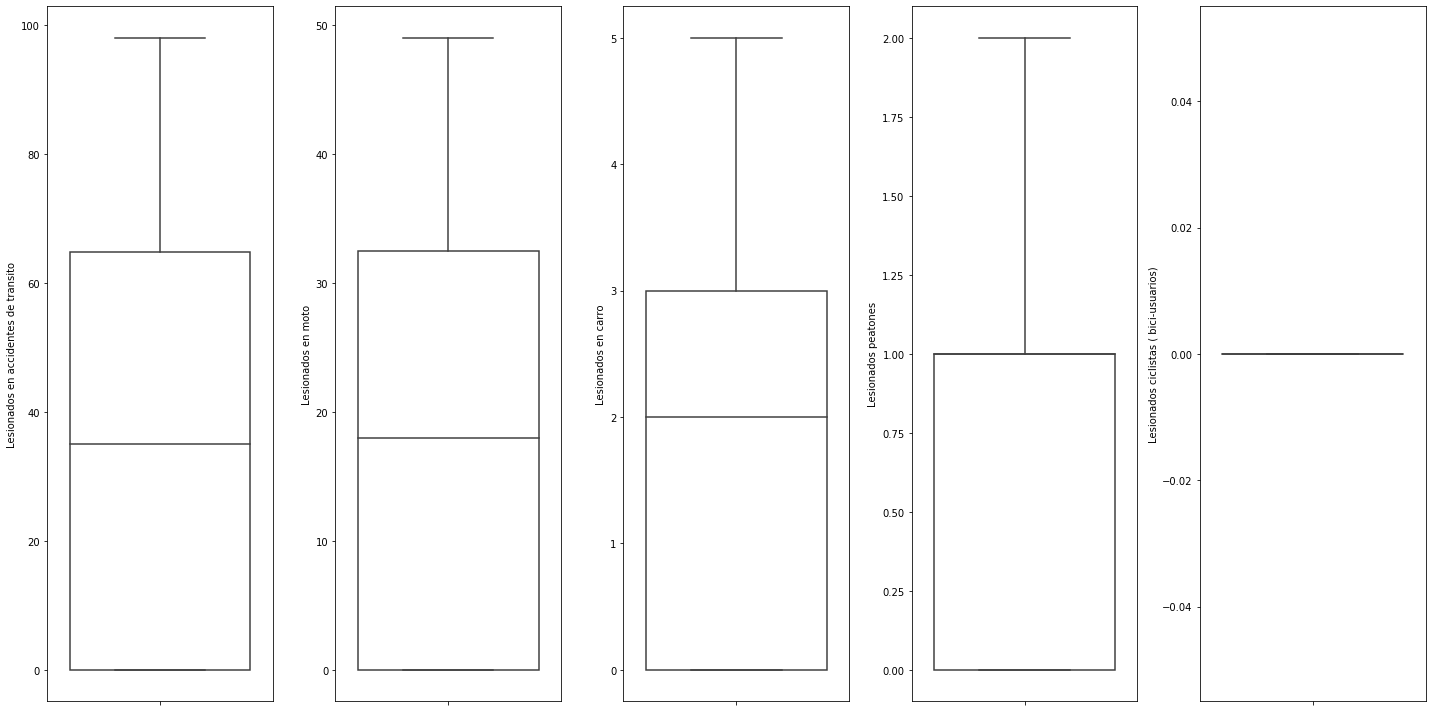

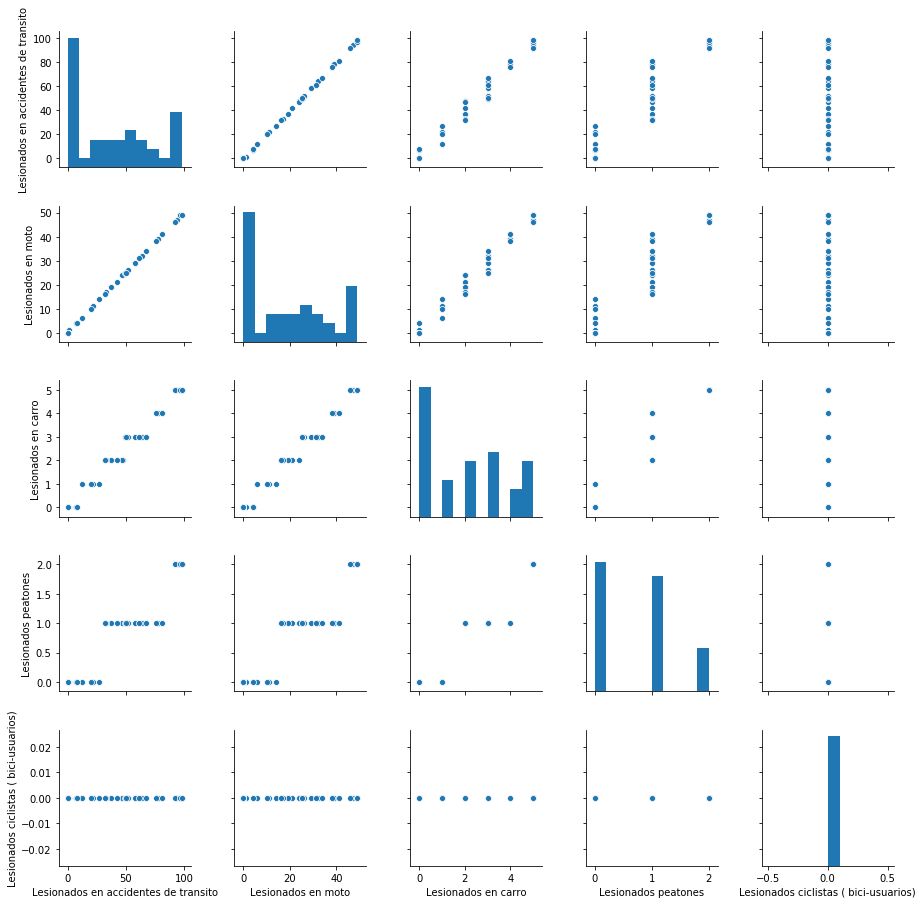

Revisando la distribución numerica de los datos


,count,mean,std,min,25%,50%,75%,max
Número de muertes en accidentes de transito,40.0,11.025,11.328402,0.0,0.0,7.0,22.50,30.0
Número de muertes en moto,40.0,5.650,5.717943,0.0,0.0,3.5,11.25,15.0
Lesionados en carro,40.0,0.500,0.554700,0.0,0.0,0.0,1.00,2.0
Muertes de peatones,40.0,0.025,0.158114,0.0,0.0,0.0,0.00,1.0
Muertes de ciclistas ( bici-usuarios),40.0,0.000,0.000000,0.0,0.0,0.0,0.00,0.0


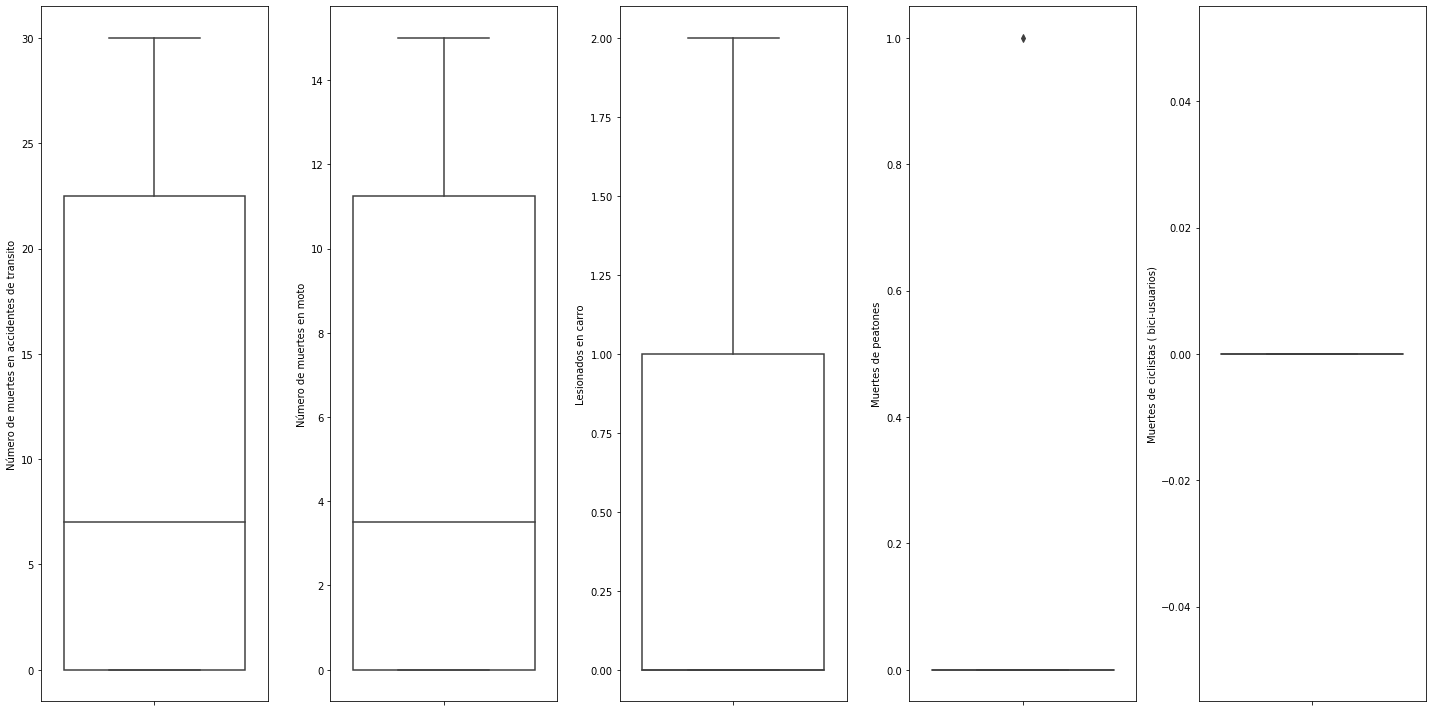

In [ ]:
for idx, value in enumerate(data_frames):
    numerico(value)

Indicadores de convivencia decr


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Fecha                                                41 non-null     datetime64[ns]
 1   Número de Desacatos a decretos de COVID-19           41 non-null     int64         
 2   Establecimientos que incumplan decretos de COVID-19  41 non-null     int64         
 3   Menores de edad que incumplan decretos COVID-19      41 non-null     int64         
 4   Casos de violencia intrafamiliar atendidos           41 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.7 KB
None
       Fecha  Número de Desacatos a decretos de COVID-19  \
0 2020-02-20                                           0   
1 2020-02-21                                           0   

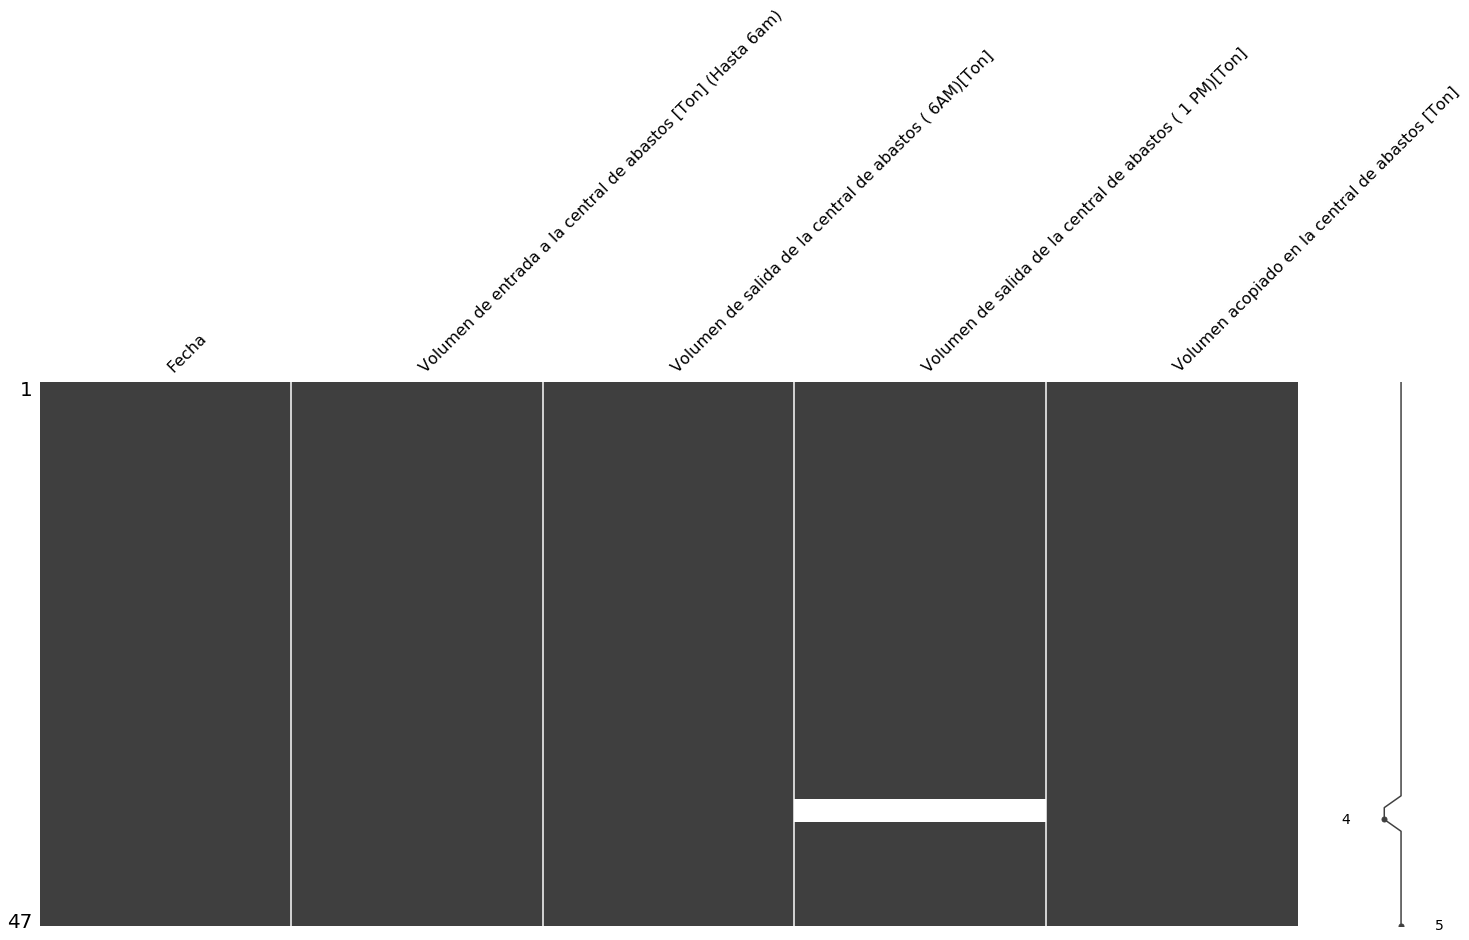

No se encontraron datos duplicados
indices del dataframe: 
 RangeIndex(start=0, stop=47, step=1)

forma del dataframe: 
 (47, 5)

descripción del dataframe: 
        Volumen de entrada a la central de abastos [Ton] (Hasta 6am)  \
count                                          47.000000              
mean                                         1664.431915              
std                                           699.726580              
min                                           381.000000              
25%                                          1198.000000              
50%                                          1526.000000              
75%                                          2161.500000              
max                                          3051.000000              

       Volumen de salida de la central de abastos ( 6AM)[Ton]  \
count                                          47.000000        
mean                                          471.821277        
std   

In [27]:
for idx, value in enumrate(data_frames):
    print(names[idx])
    reporte(value)